In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
project_df = pd.read_excel("projectsdata.xlsx", sheet_name="123")
deals_df = pd.read_excel("Сделки_2025-11-25.xlsx", sheet_name="Лист1")

In [4]:
deals_df = deals_df[deals_df["Количество комнат"] != "-"]
project_df = project_df.rename(columns={"Этожей до": "Этажей до"})
project_df = project_df.dropna(subset=["Этаж"])

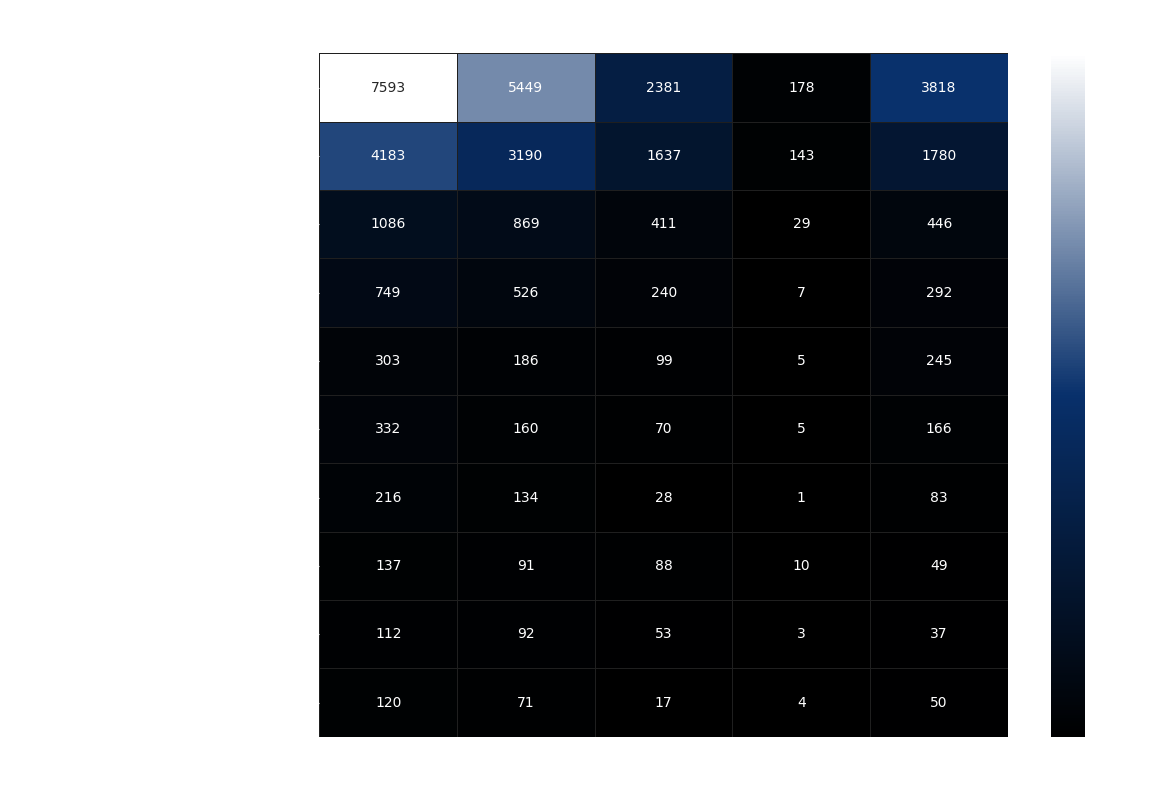

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# === ПОДГОТОВКА ДАННЫХ (как у вас) ===
dd = deals_df[deals_df["Класс"] == "Комфорт"]
ct = pd.crosstab(dd["Название банка"], dd["Количество комнат"])

# Считаем топ-10
top_banks = ct.sum(axis=1).sort_values(ascending=False).head(10).index
ct_top = ct.loc[top_banks]

# === НАСТРОЙКА ЦВЕТА И СТИЛЯ ===

# 1. Создаем кастомный градиент: Черный -> Синий -> Белый
# #000000 - черный
# #08306B - темно-синий (благородный оттенок)
# #FFFFFF - белый
colors = ["#000000", "#08306B", "#FFFFFF"]
cmap_custom = LinearSegmentedColormap.from_list("black_blue_white", colors, N=256)

# 2. Настройки для красивого отображения на темном/прозрачном фоне
plt.rcParams.update({
    "font.family": "sans-serif",
    "text.color": "white",            # Цвет заголовков и подписей
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "figure.facecolor": "none",       # Прозрачный фон
    "axes.facecolor": "none"
})

plt.figure(figsize=(12, 8))

# 3. Рисуем Heatmap
ax = sns.heatmap(
    ct_top, 
    annot=True, 
    fmt="d", 
    cmap=cmap_custom,    # Применяем нашу палитру
    linewidths=0.5,      # Тонкая сетка
    linecolor='#1f1f1f', # Цвет сетки (темно-серый, чтобы не резало глаз на черном)
    cbar_kws={'label': 'Количество сделок'}
)

# Настройка Colorbar (шкалы справа), чтобы текст был белым
cbar = ax.collections[0].colorbar
cbar.set_label('Количество сделок', color='white')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')
# Убираем рамку у шкалы
cbar.outline.set_visible(False)

plt.title("Топ-10 банков vs Комнатность (Класс Комфорт)", fontsize=14, color='white', pad=20)
plt.ylabel("Банк", color='white')
plt.xlabel("Количество комнат", color='white')

plt.tight_layout()
plt.show()

/var/folders/9p/9dnzxv_14xzfxqhz4nxv413c0000gn/T/ipykernel_71307/3948188848.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


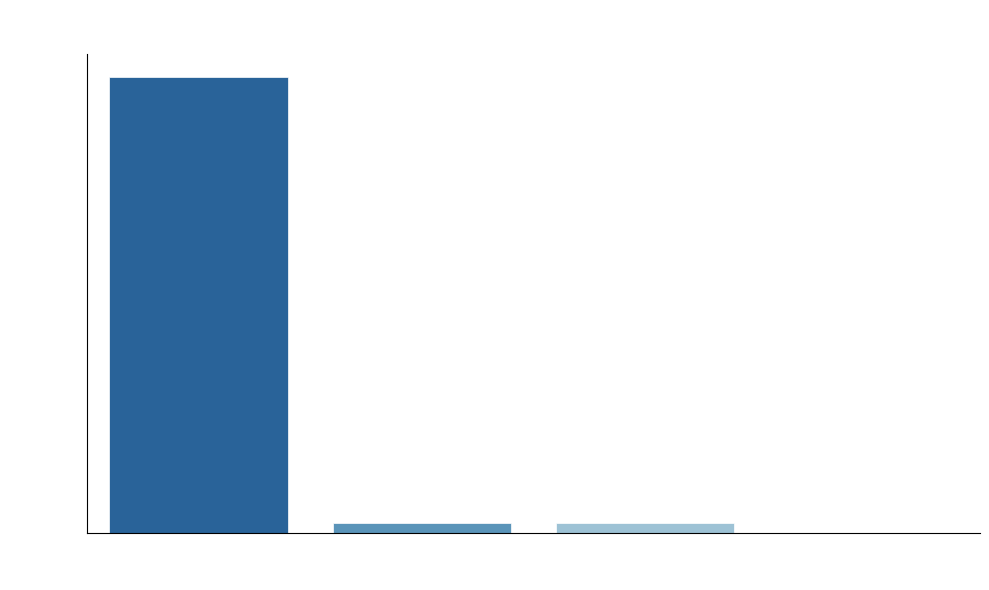

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. ПОДГОТОВКА ДАННЫХ ===
# Считаем количество сделок по каждому классу и сортируем от большего к меньшему
class_counts = deals_df["Класс"].value_counts().reset_index()
class_counts.columns = ["Класс", "Количество"]

# === 2. НАСТРОЙКИ СТИЛЯ (ТЕМНЫЙ/ПРОЗРАЧНЫЙ) ===
plt.rcParams.update({
    "font.family": "sans-serif",
    "text.color": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "figure.facecolor": "none",
    "axes.facecolor": "none"
})

plt.figure(figsize=(10, 6))

# === 3. ПОСТРОЕНИЕ ГРАФИКА ===
# Используем палитру Blues_r (Reversed), чтобы самый популярный класс был темно-синим (#08306B),
# а менее популярные — светлее. Это поддерживает вашу стилистику.
ax = sns.barplot(
    data=class_counts,
    x="Класс",
    y="Количество",
    palette="Blues_r",  # Градиент синего
    edgecolor="white",  # Тонкая белая окантовка для контраста
    linewidth=0.5
)

# === 4. ДОБАВЛЕНИЕ ЦИФР НАД СТОЛБЦАМИ ===
for container in ax.containers:
    ax.bar_label(
        container, 
        fmt='%d', 
        padding=5, 
        color='white', 
        fontsize=12, 
        fontweight='bold'
    )

# === 5. ОФОРМЛЕНИЕ ===
plt.title("Распределение сделок по Классам жилья", fontsize=16, pad=20, color='white')
plt.xlabel("Класс жилья", fontsize=12)
plt.ylabel("Количество сделок", fontsize=12)

# Убираем лишние рамки (сверху и справа), оставляем только оси
sns.despine()

# Убираем рамку полностью, если хотите "парящий" график (опционально)
# sns.despine(left=True, bottom=True) 

plt.tight_layout()
plt.show()

In [ ]:
.head()

,Название региона,Город,Район,Округ,Класс,Конструкция объекта,Застройщик,Название ЖК,Адрес корпуса,ID корпуса,...,Этаж лота,Количество комнат,Суммарная площадь сделок,Сумма бюджета,Скидка,Внутренняя отделка,Продавец,Покупатель,Ипотека,Название банка
0,Новая Москва,Николо-Хованское дер.,НАО,Коммунарка,Комфорт,Монолит-блоки,А101,Прокшино,"Сосенское пос., кв-л 26, з/у 3/3, к. 10.1.5",002b4f20e97d6ca8ac349b5e2e9e81d3,...,5,1,36.10,13228050.80,без скидки,Под чистовую и отделка как доп. опция,ФЛ,ФЛ,Ипотека,ПАО Сбербанк России
1,Новая Москва,Николо-Хованское дер.,НАО,Коммунарка,Комфорт,Монолит-блоки,А101,Прокшино,"Сосенское пос., кв-л 26, з/у 3/3, к. 10.1.5",002b4f20e97d6ca8ac349b5e2e9e81d3,...,2,1,38.50,13007417.89,без скидки,Под чистовую и отделка как доп. опция,ЮЛ,ФЛ,Ипотека,ПАО Сбербанк России
2,Новая Москва,Николо-Хованское дер.,НАО,Коммунарка,Комфорт,Монолит-блоки,А101,Прокшино,"Сосенское пос., кв-л 26, з/у 3/3, к. 10.1.5",002b4f20e97d6ca8ac349b5e2e9e81d3,...,15,2,61.00,17943150.00,без скидки,Под чистовую и отделка как доп. опция,ЮЛ,ФЛ,Нет,NaN
3,Новая Москва,Николо-Хованское дер.,НАО,Коммунарка,Комфорт,Монолит-блоки,А101,Прокшино,"Сосенское пос., кв-л 26, з/у 3/3, к. 10.1.5",002b4f20e97d6ca8ac349b5e2e9e81d3,...,16,2,59.40,17281193.00,без скидки,Под чистовую и отделка как доп. опция,ЮЛ,ФЛ,Ипотека,ПАО Совкомбанк
4,Новая Москва,Николо-Хованское дер.,НАО,Коммунарка,Комфорт,Монолит-блоки,А101,Прокшино,"Сосенское пос., кв-л 26, з/у 3/3, к. 10.1.5",002b4f20e97d6ca8ac349b5e2e9e81d3,...,11,2,61.00,17308253.00,со скидкой и без скидки,Под чистовую и отделка как доп. опция,ЮЛ,ФЛ,Нет,NaN


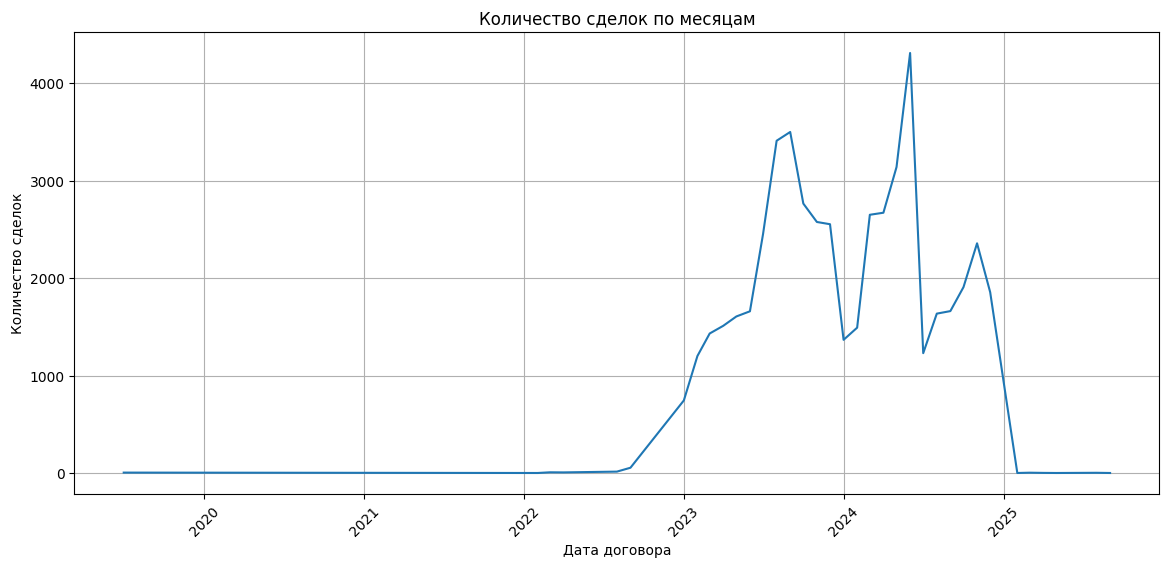

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Убедимся, что дата в datetime
deals_df["Дата договора (месяц.год)"] = pd.to_datetime(deals_df["Дата договора (месяц.год)"], errors='coerce')

# Группируем по дате и считаем количество сделок
deals_over_time = deals_df.groupby(deals_df["Дата договора (месяц.год)"].dt.to_period("M"))["Суммарное количество сделок"].sum()
deals_over_time = deals_over_time.to_timestamp()  # Переводим обратно в datetime для графика

# Строим график
plt.figure(figsize=(14,6))
sns.lineplot(x=deals_over_time.index, y=deals_over_time.values)
plt.title("Количество сделок по месяцам")
plt.xlabel("Дата договора")
plt.ylabel("Количество сделок")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [109]:
# Source - https://translated.turbopages.orghttps://translated.turbopages.org/proxy_u/en-ru.ru.560abdf7-69274bea-b827b0d7-74722d776562/https/stackoverflow.com/a
# Posted by Engineero, modified by community. See post 'Timeline' for change history
# Retrieved 2025-11-26, License - CC BY-SA 4.0

percent_missing = deals_df.isnull().sum() * 100 / len(deals_df)
missing_value_df = pd.DataFrame({'column_name': deals_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df


,column_name,percent_missing
Название региона,Название региона,0.000000
Город,Город,0.000000
Район,Район,0.000000
Округ,Округ,0.000000
Класс,Класс,0.000000
Конструкция объекта,Конструкция объекта,0.000000
Застройщик,Застройщик,0.000000
Название ЖК,Название ЖК,0.000000
Адрес корпуса,Адрес корпуса,0.000000
ID корпуса,ID корпуса,0.000000


In [104]:
project_df[project_df["Этаж"].isnull()]

,ИСТОЧНИК ДАННЫХ,ID корпуса,Проект,Класс проекта,Девелопер,Конструкця дома,Этажей от,Этажей до,Адрес,Плановая дата РВЭ,Стадия строительства,Тип договора реализации,Тип объекта недвижимости,Этаж,Кол-во комнат,Общая проектная площадь,Количество лотов
3564,Полную версию и еще больше аналитических инстр...,a80eac902ecf809fe988c0da437baa8b,Скандинавия,Комфорт,А101,Монолит-блоки,16,16,"Сосенское пос., д. 22, к. 22.1",2024-09-20,Введен в эксплуатацию,ДДУ с эскроу,нежилое помещение,NaN,Без типа,425.6,6
17037,Полную версию и еще больше аналитических инстр...,9a35816738cf063a394f82100015e7a3,Скандинавия,Комфорт,А101,Монолит-блоки,14,14,"Сосенское пос., д. 22, к. 22.3",2024-09-20,Введен в эксплуатацию,ДДУ с эскроу,нежилое помещение,NaN,Без типа,340.8,6


In [40]:
deals_df["Застройщик"].unique().tolist()

erz_top_dict = {
    'А101': 3, 'Абсолют Недвижимость': 9, 'Горакс': 56, 'Самолет': 2, 'ПИК': 1,
    'ФСК / ДСК-1': 5, 'Центрстрой': 108, 'Инвесттраст': -1, 'УЭЗ': 21,
    'Стройком': 38, 'РОСТ': 28, 'Sezar Group': 35, '3S GROUP': 36, 'Родина': 23,
    'Plus Development': 26, 'INGRAD': -1, 'Новые кварталы': -1, 'Группа Аквилон': 24,
    'Крост': 28, 'Атлант': 54, 'Barkli': -1, 'Выбор': -1, 'Unikey': 33
}

erz_rating_dict = {
    'А101': 5, 
    'Абсолют Недвижимость': 4.5, 
    'Горакс': -1, 
    'Самолет': 4, 
    'ПИК': 5,
    'ФСК / ДСК-1': 4, 
    'Центрстрой': 0.5, 
    'Инвесттраст': 4, 
    'УЭЗ': 0.5,
    'Стройком': -1, 
    'РОСТ': -1, 
    'Sezar Group': 5, 
    '3S GROUP': 1.5, 
    'Родина': -1,
    'Plus Development': -1, 
    'INGRAD': -1, 
    'Новые кварталы': 0, 
    'Группа Аквилон': 4.5,
    'Крост': 1.5, 
    'Атлант': -1, 
    'Barkli': 0.5, 
    'Выбор': 5, 
    'Unikey': 5
}

deals_df['erz_top'] = deals_df['Застройщик'].map(erz_top_dict)
deals_df['erz_rating'] = deals_df['Застройщик'].map(erz_rating_dict)

""" 
name, erz_top, erz_rating
a101 3 5
абсолют 9 4.5
горакс 56 -1
самолет 2 4
пик 1 5
фск 5 4
центрстрой 108 0.5
инвесттраст -1 4
уэз 21 0.5
стройком 38 -1
рост 28 -1
sezar 35 5
3s 36 1.5
родина 23 -1
плюс 26 -1
инград -1 -1
новые кварталы -1 0
аквилон 24 4.5
крост 28 1.5
атлант 54 -1
barkli -1 0.5
выбор -1 5
unikey 33 5
"""


' \nname, erz_top, erz_rating\na101 3 5\nабсолют 9 4.5\nгоракс 56 -1\nсамолет 2 4\nпик 1 5\nфск 5 4\nцентрстрой 108 0.5\nинвесттраст -1 4\nуэз 21 0.5\nстройком 38 -1\nрост 28 -1\nsezar 35 5\n3s 36 1.5\nродина 23 -1\nплюс 26 -1\nинград -1 -1\nновые кварталы -1 0\nаквилон 24 4.5\nкрост 28 1.5\nатлант 54 -1\nbarkli -1 0.5\nвыбор -1 5\nunikey 33 5\n'

In [41]:
deals_df.dtypes

Название региона                        object
Город                                   object
Район                                   object
Округ                                   object
Класс                                   object
Конструкция объекта                     object
Застройщик                              object
Название ЖК                             object
Адрес корпуса                           object
ID корпуса                              object
Текущая стадия строительства            object
Дата начала продаж              datetime64[ns]
Дата ввода в эксплуатацию       datetime64[ns]
Дата договора (месяц.год)       datetime64[ns]
Дата регистрации (месяц.год)    datetime64[ns]
Уступка                                 object
Суммарное количество сделок              int64
Тип лота                                object
Этаж лота                                int64
Количество комнат                       object
Суммарная площадь сделок                object
Сумма бюджета

/var/folders/9p/9dnzxv_14xzfxqhz4nxv413c0000gn/T/ipykernel_25588/1710383726.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Количество комнат", y="Суммарное количество сделок", data=room_counts, palette="Blues_d")


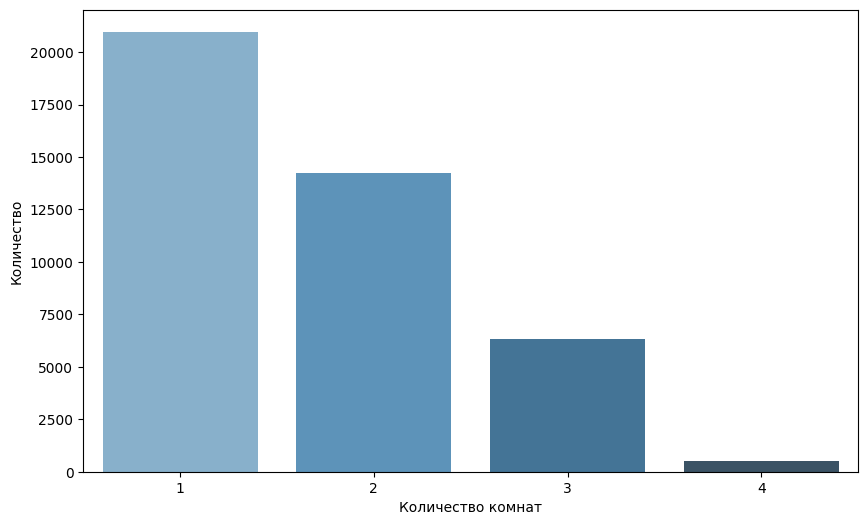

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем количество комнат в числовой тип
deals_df["Количество комнат"] = pd.to_numeric(deals_df["Количество комнат"], errors='coerce')

# Группируем по количеству комнат

room_counts = deals_df.groupby("Количество комнат")["Суммарное количество сделок"].sum().reset_index()
room_counts["Количество комнат"] = room_counts["Количество комнат"].astype(int)


plt.figure(figsize=(10,6))

# Столбчатый график
sns.barplot(x="Количество комнат", y="Суммарное количество сделок", data=room_counts, palette="Blues_d")


plt.xlabel("Количество комнат")
plt.ylabel("Количество")
plt.show()


/var/folders/9p/9dnzxv_14xzfxqhz4nxv413c0000gn/T/ipykernel_25588/1777144876.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ипотека", y="Количество", data=mortgage_counts, palette="Set2")


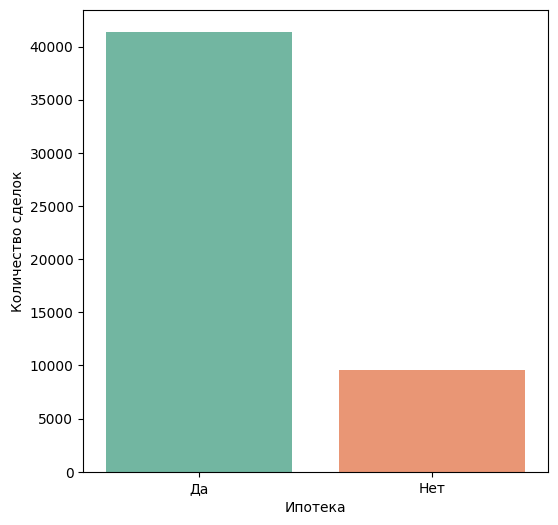

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем значения колонки
deals_df["Ипотека_флаг"] = deals_df["Ипотека"].replace({"Ипотека": "Да", "Нет": "Нет"})

# Считаем количество сделок
mortgage_counts = deals_df["Ипотека_флаг"].value_counts().reindex(["Да", "Нет"]).reset_index()
mortgage_counts.columns = ["Ипотека", "Количество"]

plt.figure(figsize=(6,6))
sns.barplot(x="Ипотека", y="Количество", data=mortgage_counts, palette="Set2")

plt.xlabel("Ипотека")
plt.ylabel("Количество сделок")

# Цифры сверху не добавляем
plt.show()


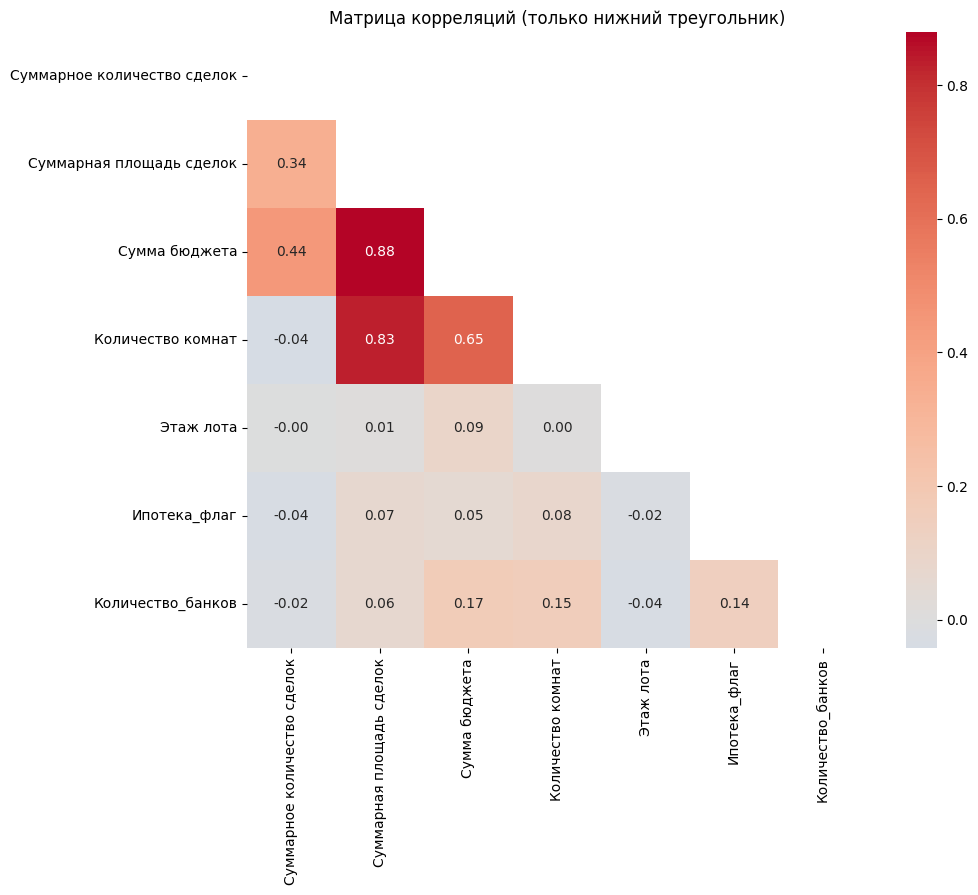

In [62]:
import numpy as np
# Числовые признаки
deals_df["Количество комнат"] = pd.to_numeric(deals_df["Количество комнат"], errors='coerce')
deals_df["Суммарная площадь сделок"] = pd.to_numeric(deals_df["Суммарная площадь сделок"].str.replace(',', '.'), errors='coerce')

# Ипотека в бинарный формат
deals_df["Ипотека_флаг"] = deals_df["Ипотека"].map({"Ипотека": 1, "Нет": 0})

# Допустим, посчитаем количество банков на ЖК
banks_per_project = deals_df.groupby("Название ЖК")["Название банка"].nunique()
deals_df = deals_df.merge(banks_per_project.rename("Количество_банков"), on="Название ЖК", how="left")

# Выбираем числовые признаки для корреляции
num_cols = ["Суммарное количество сделок", "Суммарная площадь сделок",
            "Сумма бюджета", "Количество комнат", "Этаж лота",
            "Ипотека_флаг", "Количество_банков"]

corr_matrix = deals_df[num_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # верхний треугольник скрываем

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Матрица корреляций (только нижний треугольник)")
plt.show()


           count        mean         std   min    25%    50%    75%     max
Ипотека                                                                    
Ипотека  41391.0  339.338721  277.633037 -28.0  133.0  311.0  505.0  5752.0
Нет       9564.0  307.592744  327.361953 -27.0   87.0  242.0  435.0  3775.0


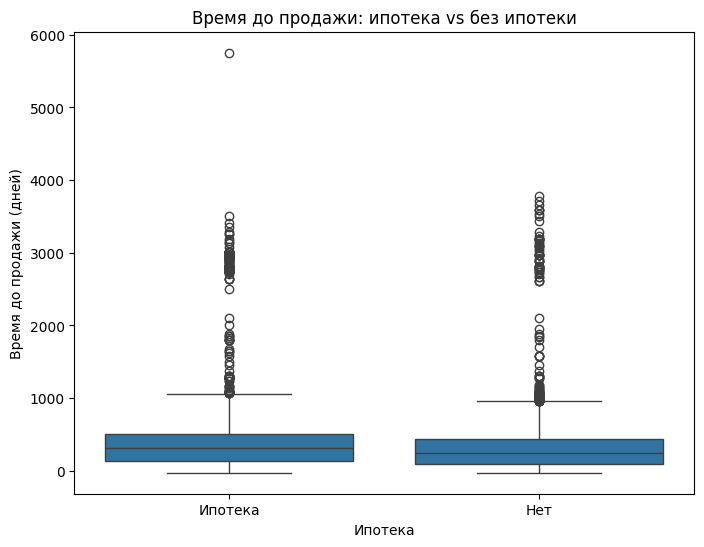

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Убедимся, что даты в datetime (у тебя они уже в datetime64[ns], но на всякий случай)
deals_df["Дата начала продаж"] = pd.to_datetime(deals_df["Дата начала продаж"], errors='coerce')
deals_df["Дата договора (месяц.год)"] = pd.to_datetime(deals_df["Дата договора (месяц.год)"], errors='coerce')

# Вычисляем время до продажи в днях
deals_df["Время_до_продажи_дн"] = (deals_df["Дата договора (месяц.год)"] - deals_df["Дата начала продаж"]).dt.days

# Смотрим статистику по ипотеке
speed_stats = deals_df.groupby("Ипотека")["Время_до_продажи_дн"].describe()
print(speed_stats)

# Визуализация
plt.figure(figsize=(8,6))
sns.boxplot(x="Ипотека", y="Время_до_продажи_дн", data=deals_df)
plt.title("Время до продажи: ипотека vs без ипотеки")
plt.ylabel("Время до продажи (дней)")
plt.xlabel("Ипотека")
plt.show()
